In [9]:
import pandas as pd
import numpy as np
from common import *
from glob import glob
from os import rename, path
from gensim import corpora
from os.path import basename, splitext

from matplotlib import pyplot as plt
import logging, json

from tqdm import tqdm

import gensim
from gensim import corpora, models, similarities

DATA_FOLDER = '../data/'
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
all_docs = get_all_docs(DATA_FOLDER)

# Load corpora

In [2]:
%%time
dictionary = corpora.Dictionary.load(join(DATA_FOLDER, 'pure.dict'))
corpus = corpora.MmCorpus(join(DATA_FOLDER, 'pure_corpus.mm'))

2017-07-20 14:18:47,809 : INFO : loading Dictionary object from ../data/pure.dict
2017-07-20 14:18:49,129 : INFO : loaded ../data/pure.dict
2017-07-20 14:18:49,263 : INFO : loaded corpus index from ../data/pure_corpus.mm.index
2017-07-20 14:18:49,264 : INFO : initializing corpus reader from ../data/pure_corpus.mm
2017-07-20 14:18:49,264 : INFO : accepted corpus with 1194429 documents, 2316883 features, 195209119 non-zero entries


CPU times: user 1.36 s, sys: 104 ms, total: 1.46 s
Wall time: 1.46 s


In [3]:
print(corpus)

MmCorpus(1194429 documents, 2316883 features, 195209119 non-zero entries)


In [6]:
%%time
fmodel = join(DATA_FOLDER, 'tfidf_pure.model')
if not path.exists(fmodel):    
    tfidf = models.TfidfModel(corpus)
    tfidf.save(fmodel)
else:
    tfidf = models.TfidfModel.load(fmodel)

2017-07-20 14:19:26,917 : INFO : collecting document frequencies
2017-07-20 14:19:26,920 : INFO : PROGRESS: processing document #0
2017-07-20 14:19:34,827 : INFO : PROGRESS: processing document #10000
2017-07-20 14:19:42,595 : INFO : PROGRESS: processing document #20000
2017-07-20 14:19:50,343 : INFO : PROGRESS: processing document #30000
2017-07-20 14:19:58,013 : INFO : PROGRESS: processing document #40000
2017-07-20 14:20:05,813 : INFO : PROGRESS: processing document #50000
2017-07-20 14:20:13,701 : INFO : PROGRESS: processing document #60000
2017-07-20 14:20:21,618 : INFO : PROGRESS: processing document #70000
2017-07-20 14:20:29,412 : INFO : PROGRESS: processing document #80000
2017-07-20 14:20:37,245 : INFO : PROGRESS: processing document #90000
2017-07-20 14:20:45,302 : INFO : PROGRESS: processing document #100000
2017-07-20 14:20:53,256 : INFO : PROGRESS: processing document #110000
2017-07-20 14:21:01,290 : INFO : PROGRESS: processing document #120000
2017-07-20 14:21:10,038 : 

2017-07-20 14:28:31,789 : INFO : PROGRESS: processing document #1150000
2017-07-20 14:28:32,913 : INFO : PROGRESS: processing document #1160000
2017-07-20 14:28:34,000 : INFO : PROGRESS: processing document #1170000
2017-07-20 14:28:35,075 : INFO : PROGRESS: processing document #1180000
2017-07-20 14:28:36,166 : INFO : PROGRESS: processing document #1190000
2017-07-20 14:28:38,523 : INFO : calculating IDF weights for 1194429 documents and 2316882 features (195209119 matrix non-zeros)
2017-07-20 14:28:39,834 : INFO : saving TfidfModel object under ../data/tfidf_pure.model, separately None
2017-07-20 14:28:40,169 : INFO : saved ../data/tfidf_pure.model


CPU times: user 9min 25s, sys: 3.7 s, total: 9min 29s
Wall time: 9min 13s


In [58]:
# %%time
# index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=len(dictionary), num_best=200)

In [7]:
fname = join(DATA_FOLDER, 'sim_index/sim')
if not exists(fname):
    index = similarities.Similarity(fname, tfidf[corpus], 
                                    num_features=len(dictionary), num_best=200, 
                                    chunksize=10*256, shardsize=10*32768)
    index.save(fname)
else:
    index = similarities.Similarity.load(fname)

2017-07-20 14:28:42,703 : INFO : starting similarity index under ../data/sim_index/sim
2017-07-20 14:28:55,930 : INFO : PROGRESS: fresh_shard size=10000
2017-07-20 14:29:08,947 : INFO : PROGRESS: fresh_shard size=20000
2017-07-20 14:29:21,976 : INFO : PROGRESS: fresh_shard size=30000
2017-07-20 14:29:34,791 : INFO : PROGRESS: fresh_shard size=40000
2017-07-20 14:29:47,705 : INFO : PROGRESS: fresh_shard size=50000
2017-07-20 14:30:00,812 : INFO : PROGRESS: fresh_shard size=60000
2017-07-20 14:30:13,828 : INFO : PROGRESS: fresh_shard size=70000
2017-07-20 14:30:26,862 : INFO : PROGRESS: fresh_shard size=80000
2017-07-20 14:30:39,823 : INFO : PROGRESS: fresh_shard size=90000
2017-07-20 14:30:53,080 : INFO : PROGRESS: fresh_shard size=100000
2017-07-20 14:31:06,133 : INFO : PROGRESS: fresh_shard size=110000
2017-07-20 14:31:19,179 : INFO : PROGRESS: fresh_shard size=120000
2017-07-20 14:31:32,128 : INFO : PROGRESS: fresh_shard size=130000
2017-07-20 14:31:45,258 : INFO : PROGRESS: fresh_sh

2017-07-20 14:44:52,623 : INFO : PROGRESS: at document #60000/327680
2017-07-20 14:44:57,082 : INFO : PROGRESS: at document #70000/327680
2017-07-20 14:45:01,603 : INFO : PROGRESS: at document #80000/327680
2017-07-20 14:45:05,884 : INFO : PROGRESS: at document #90000/327680
2017-07-20 14:45:10,266 : INFO : PROGRESS: at document #100000/327680
2017-07-20 14:45:14,653 : INFO : PROGRESS: at document #110000/327680
2017-07-20 14:45:19,192 : INFO : PROGRESS: at document #120000/327680
2017-07-20 14:45:23,571 : INFO : PROGRESS: at document #130000/327680
2017-07-20 14:45:27,985 : INFO : PROGRESS: at document #140000/327680
2017-07-20 14:45:32,441 : INFO : PROGRESS: at document #150000/327680
2017-07-20 14:45:36,691 : INFO : PROGRESS: at document #160000/327680
2017-07-20 14:45:41,008 : INFO : PROGRESS: at document #170000/327680
2017-07-20 14:45:45,181 : INFO : PROGRESS: at document #180000/327680
2017-07-20 14:45:49,372 : INFO : PROGRESS: at document #190000/327680
2017-07-20 14:45:53,750 

2017-07-20 14:49:25,616 : INFO : PROGRESS: fresh_shard size=0
2017-07-20 14:49:30,659 : INFO : PROGRESS: fresh_shard size=10000
2017-07-20 14:49:35,498 : INFO : PROGRESS: fresh_shard size=20000
2017-07-20 14:49:40,379 : INFO : PROGRESS: fresh_shard size=30000
2017-07-20 14:49:45,159 : INFO : PROGRESS: fresh_shard size=40000
2017-07-20 14:49:50,047 : INFO : PROGRESS: fresh_shard size=50000
2017-07-20 14:49:58,947 : INFO : PROGRESS: fresh_shard size=60000
2017-07-20 14:50:09,174 : INFO : PROGRESS: fresh_shard size=70000
2017-07-20 14:50:13,996 : INFO : PROGRESS: fresh_shard size=80000
2017-07-20 14:50:18,332 : INFO : PROGRESS: fresh_shard size=90000
2017-07-20 14:50:22,464 : INFO : PROGRESS: fresh_shard size=100000
2017-07-20 14:50:26,597 : INFO : PROGRESS: fresh_shard size=110000
2017-07-20 14:50:30,787 : INFO : PROGRESS: fresh_shard size=120000
2017-07-20 14:50:34,903 : INFO : PROGRESS: fresh_shard size=130000
2017-07-20 14:50:39,124 : INFO : PROGRESS: fresh_shard size=140000
2017-07-2

CPU times: user 22min 46s, sys: 4.06 s, total: 22min 50s
Wall time: 22min 49s


# Validate

In [10]:
with open(join(DATA_FOLDER, 'gold.json'), 'r') as f:
    gold = json.load(f)

In [13]:
val_docs = glob(join(DATA_FOLDER, 'validate/*.txt'))

In [14]:
preds = {}
for fname in tqdm(val_docs):
    with open(fname, 'r') as f:
        doc_text = f.read()
    vec_bow = dictionary.doc2bow(tokenize(doc_text))
    vec_model = tfidf[vec_bow] # convert the query to model space
    preds[splitext(basename(fname))[0]] = index[vec_model]

100%|██████████| 130/130 [02:09<00:00,  1.03s/it]


In [15]:
new_pred = {}
for k, v in preds.items():
    new_pred[k] = [splitext(basename(all_docs[key]))[0] for key, sim in v]

In [11]:
# new_pred['e75dcef9-73b5-40c1-45be-33a191b6440c']

median
acc10     0.000000
acc20     0.000000
acc200    0.666667
dtype: float64
mean
acc10     0.328462
acc20     0.388974
acc200    0.592692
dtype: float64


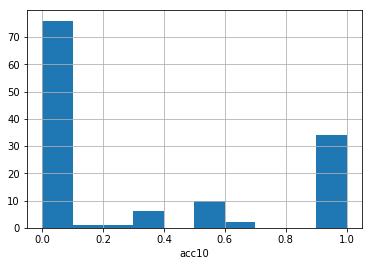

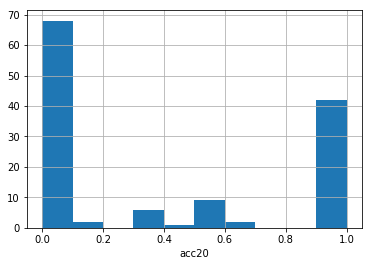

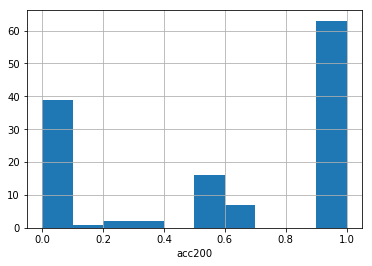

In [21]:
res = evaluate(new_pred, gold)